<a href="https://colab.research.google.com/github/AlanItzep/AplicacionJS/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.layers import Input, Dense
from keras.models import Model

In [0]:
encoding_dim = 32

In [0]:
input_img = Input(shape=(784,))

In [0]:
encoded = Dense(encoding_dim, activation = 'relu')(input_img)

In [0]:
decoded = Dense(784, activation = 'sigmoid')(encoded)

In [0]:
autoencoder = Model(input_img, decoded)

In [0]:
encoder = Model(input_img, encoded)

In [0]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [60]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [61]:
autoencoder.fit(x_train, x_train,
               epochs=100,
               batch_size = 256,
               shuffle = True,
               validation_data = (x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 70us/step - loss: 0.3553 - val_loss: 0.2699
Epoch 2/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.2617 - val_loss: 0.2498
Epoch 3/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.2399 - val_loss: 0.2280
Epoch 4/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.2204 - val_loss: 0.2103
Epoch 5/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.2052 - val_loss: 0.1975
Epoch 6/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.1939 - val_loss: 0.1877
Epoch 7/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.1851 - val_loss: 0.1798
Epoch 8/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.1779 - val_loss: 0.1733
Epoch 9/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.1720 - val_loss: 0.1

In [0]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

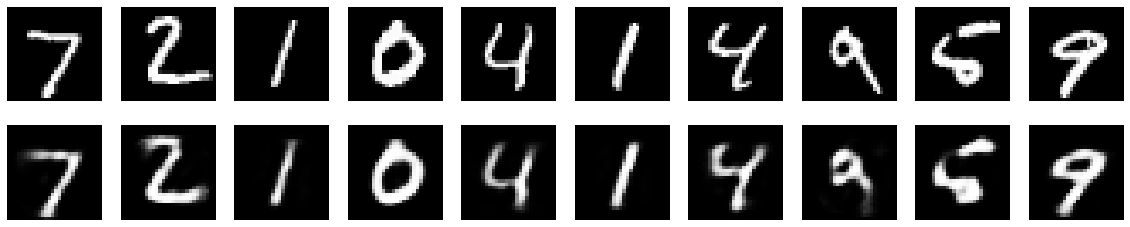

In [65]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize =(20,4))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()